In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
import matplotlib.pyplot as plt
# import seaborn as sns
# import sweetviz


from  sklearn.model_selection import train_test_split
from  sklearn.preprocessing import OneHotEncoder
from  sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
df = df.drop(['id', 'CustomerId','Surname'], axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
df_test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
df_test = df_test.drop(['id', 'CustomerId','Surname'], axis = 1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


In [6]:
target = 'Exited'

categorical_vars = [x for x in df.select_dtypes(include = ['object']). columns if x != target]
continuos_vars = [x for x in df.select_dtypes(exclude = ['object']).columns if x != target]

print(f'categorical_vars:  {categorical_vars}')
print(f'continuos_vars:  {continuos_vars}')

categorical_vars:  ['Geography', 'Gender']
continuos_vars:  ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


<Axes: xlabel='Exited'>

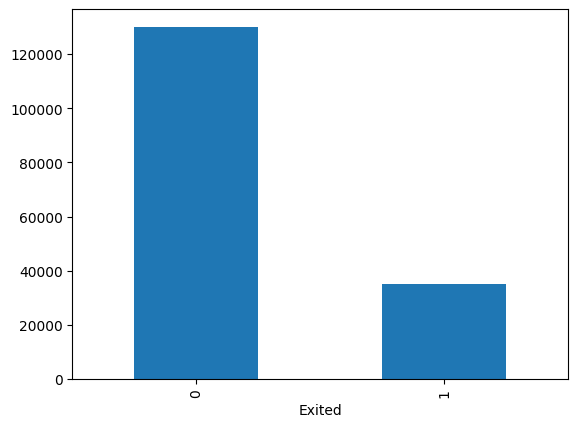

In [7]:
df['Exited'].value_counts().plot.bar()

# EDA

# sweetvizEDA

# df_train

In [8]:
df_train = df

In [9]:
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


## credit score

## Split antes de aplicar qualquer tratamento

In [10]:
x = df_train.drop('Exited', axis = 1)
y = df_train['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 41, stratify = y)


In [11]:

# Áp dụng get_dummies để tạo các biến giả trong các tập huấn luyện và kiểm tra một cách riêng biệt
encoded_train = pd.get_dummies(x_train[categorical_vars], drop_first=False)
encoded_test = pd.get_dummies(x_test[categorical_vars], drop_first=False)

# Chuyển đổi các biến giả từ định dạng boolean sang định dạng 1 và 0
encoded_train = encoded_train.astype(int)
encoded_test = encoded_test.astype(int)

# Ghép các biến giả với các biến không phải phân loại cho cả tập huấn luyện và tập kiểm tra
df_encoded_train = pd.concat([x_train.drop(columns=categorical_vars), encoded_train], axis=1)
df_encoded_test = pd.concat([x_test.drop(columns=categorical_vars), encoded_test], axis=1)



In [12]:
# Khởi tạo MinMaxScaler
scaler = MinMaxScaler()

# Điều chỉnh scaler cho dữ liệu huấn luyện và chuẩn hóa dữ liệu huấn luyện
scaled_train_data = scaler.fit_transform(df_encoded_train)

# Chuẩn hóa dữ liệu kiểm tra bằng cách sử dụng scaler đã được điều chỉnh trên dữ liệu huấn luyện
scaled_test_data = scaler.transform(df_encoded_test)

# Chuyển dữ liệu đã chuẩn hóa trở lại thành DataFrame
scaled_train_df = pd.DataFrame(scaled_train_data, columns=df_encoded_train.columns)
scaled_test_df = pd.DataFrame(scaled_test_data, columns=df_encoded_test.columns)



In [13]:
scaled_train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.578,0.135135,0.9,0.541763,0.000000,1.0,1.0,0.634081,1.0,0.0,0.0,0.0,1.0
1,0.400,0.310811,1.0,0.571350,0.000000,1.0,0.0,0.365313,0.0,1.0,0.0,1.0,0.0
2,0.824,0.283784,0.9,0.000000,0.333333,1.0,1.0,0.673897,1.0,0.0,0.0,1.0,0.0
3,0.646,0.189189,0.2,0.000000,0.000000,1.0,1.0,0.259832,1.0,0.0,0.0,1.0,0.0
4,0.674,0.135135,1.0,0.663724,0.000000,1.0,1.0,0.691910,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132022,0.672,0.310811,0.3,0.424561,0.000000,1.0,0.0,0.740508,0.0,1.0,0.0,0.0,1.0
132023,0.706,0.054054,0.9,0.316738,0.000000,1.0,0.0,0.717982,0.0,0.0,1.0,0.0,1.0
132024,0.670,0.283784,0.3,0.000000,0.333333,1.0,0.0,0.915004,0.0,0.0,1.0,1.0,0.0
132025,0.570,0.486486,0.8,0.539225,1.000000,0.0,0.0,0.908264,0.0,1.0,0.0,1.0,0.0


# Model BASELINE

In [14]:

models = [
    {
        'name': 'Decision Tree',
        'estimator': DecisionTreeClassifier(),
        'params': {'max_depth': [None, 5, 10, 20]}
    }
]


metrics = {
    'Accuracy': accuracy_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

results = []


for model in models:
    print(f"Training {model['name']}...")
    
    clf = GridSearchCV(model['estimator'], model['params'], cv=5, scoring='roc_auc', verbose = 5)
    clf.fit(scaled_train_df, y_train)

    best_model = clf.best_estimator_
    scores = {}
    for metric_name, metric_func in metrics.items():
        scores[metric_name] = metric_func(y_test, best_model.predict(scaled_test_df))

    result = {
        'Model': model['name'],
        'Best Parameters': clf.best_params_,
        **scores
    }
    results.append(result)


results_df = pd.DataFrame(results)
print(results_df)


Training Decision Tree...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....................max_depth=None;, score=0.707 total time=   1.1s
[CV 2/5] END ....................max_depth=None;, score=0.701 total time=   1.0s
[CV 3/5] END ....................max_depth=None;, score=0.708 total time=   1.0s
[CV 4/5] END ....................max_depth=None;, score=0.701 total time=   1.1s
[CV 5/5] END ....................max_depth=None;, score=0.707 total time=   1.0s
[CV 1/5] END .......................max_depth=5;, score=0.871 total time=   0.4s
[CV 2/5] END .......................max_depth=5;, score=0.872 total time=   0.4s
[CV 3/5] END .......................max_depth=5;, score=0.872 total time=   0.4s
[CV 4/5] END .......................max_depth=5;, score=0.874 total time=   0.4s
[CV 5/5] END .......................max_depth=5;, score=0.872 total time=   0.4s
[CV 1/5] END ......................max_depth=10;, score=0.870 total time=   0.6s
[CV 2/5] END ..........

In [15]:
results_df

,Model,Best Parameters,Accuracy,F1 Score,ROC AUC
0,Decision Tree,{'max_depth': 5},0.857091,0.606556,0.734006


In [16]:
print(best_model)

DecisionTreeClassifier(max_depth=5)


In [17]:
import pickle as pickle
print("Saving model to pickle file.")
pickle.dump(clf, open("bank_churn_prediction.pkl", 'wb'))


Saving model to pickle file.


### PREDICT DATA TEST

In [18]:
df_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [19]:
df_test
#Áp dụng get_dummies để tạo các biến giả trong các tập huấn luyện và kiểm tra một cách riêng biệt
encoded_test = pd.get_dummies(df_test[categorical_vars], drop_first=False)

#Chuyển đổi các biến giả từ định dạng boolean sang định dạng 1 và 0
encoded_test = encoded_test.astype(int)

#Nối các biến dummy với các biến không phải phân loại
df_encoded_test = pd.concat([df_test.drop(columns=categorical_vars), encoded_test], axis=1)

#Chuẩn hóa dữ liệu kiểm tra bằng cách sử dụng scaler được điều chỉnh trên dữ liệu huấn luyện
scaled_test_data = scaler.transform(df_encoded_test)

# Chuyển dữ liệu chuẩn hóa trở lại thành DataFrame
scaled_test_df = pd.DataFrame(scaled_test_data, columns=df_encoded_test.columns)

In [20]:
scaled_test_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.472,0.067568,0.2,0.000000,0.333333,0.0,1.0,0.804903,1.0,0.0,0.0,1.0,0.0
1,0.666,0.378378,0.2,0.000000,0.000000,1.0,0.0,0.362723,1.0,0.0,0.0,1.0,0.0
2,0.612,0.216216,0.7,0.000000,0.333333,1.0,0.0,0.694419,1.0,0.0,0.0,1.0,0.0
3,0.662,0.243243,0.8,0.000000,0.000000,1.0,0.0,0.569654,1.0,0.0,0.0,0.0,1.0
4,0.804,0.270270,1.0,0.483318,0.000000,1.0,0.0,0.697164,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,0.440,0.148649,0.7,0.462737,0.000000,1.0,1.0,0.740451,0.0,0.0,1.0,0.0,1.0
110019,0.450,0.243243,0.4,0.709581,0.000000,1.0,1.0,0.210871,1.0,0.0,0.0,1.0,0.0
110020,0.724,0.175676,0.2,0.000000,0.333333,1.0,0.0,0.081387,1.0,0.0,0.0,0.0,1.0
110021,0.718,0.189189,0.3,0.000000,0.000000,1.0,1.0,0.794101,1.0,0.0,0.0,1.0,0.0


In [21]:
sub = pd.DataFrame(best_model.predict(scaled_test_df),columns = ['Exited'])
sub

,Exited
0,0
1,1
2,0
3,0
4,0
...,...
110018,0
110019,0
110020,0
110021,0


In [22]:
df_sub = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [23]:
submission = pd.concat([df_sub['id'], sub['Exited']], axis = 1)
submission

,id,Exited
0,165034,0
1,165035,1
2,165036,0
3,165037,0
4,165038,0
...,...,...
110018,275052,0
110019,275053,0
110020,275054,0
110021,275055,0


In [24]:
submission.to_csv('submission.csv', index=False)